In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv('SMSSpamCollection', sep= '\t' , names=['Lable','SMS'])

In [3]:
data

,Lable,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.isnull().sum()

Lable    0
SMS      0
dtype: int64

([<matplotlib.patches.Wedge at 0x2509551ef90>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'Ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')])

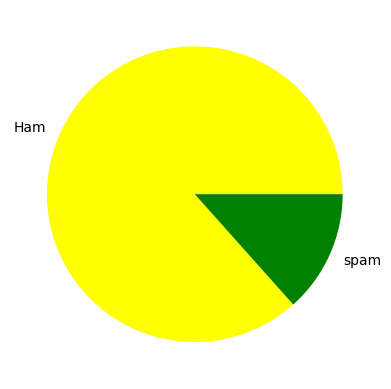

In [5]:
plt.pie(data['Lable'].value_counts() ,labels = ['Ham' , 'spam'] , colors = ['Yellow' ,'Green'])

In [6]:
encoder = LabelEncoder()
y = encoder.fit_transform(data['Lable'])

In [7]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [8]:
data['Lable'] = y 

In [9]:
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(data['SMS'])

In [10]:
data

,Lable,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.model_selection import train_test_split 

In [12]:
x_train,x_test,y_train,y_test = train_test_split (x,y ,test_size= 0.25 , random_state=None)

In [13]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 32953 stored elements and shape (4179, 8444)>

In [14]:
np.shape(x_train)

(4179, 8444)

In [15]:
np.shape(y_train)

(4179,)

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
modelnb =  MultinomialNB()

In [18]:
modelnb.fit(x_train,y_train)

MultinomialNB()

In [19]:
y_predt = modelnb.predict(x_test)

In [20]:
y_predt

array([0, 0, 0, ..., 0, 1, 0])

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_test,y_predt)

0.9842067480258435

In [22]:
precision_score(y_test,y_predt) 

np.float64(0.9011627906976745)

In [23]:
recall_score(y_test,y_predt) 

np.float64(0.96875)

In [24]:
p_predt = modelnb.predict(x_train)

In [25]:
accuracy_score(y_train,p_predt)

0.9949748743718593

In [26]:
precision_score(y_train,p_predt)

np.float64(0.9845890410958904)

In [27]:
recall_score(y_train,p_predt)

np.float64(0.979557069846678)

In [28]:
def check ():
    
    take_input = input("Enter the String of sms ")
    
    Trans_mat = vectorizer.transform([take_input])
    
    pred_output = modelnb.predict(Trans_mat)
    
    if pred_output == 0  :
        print("It is Ham")
        
    else :
        print("It is Spam")
    

In [29]:
check()

Enter the String of sms  congratulation


It is Ham
